In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [4]:
# Cargar y explorar los datos
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Análisis exploratorio
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

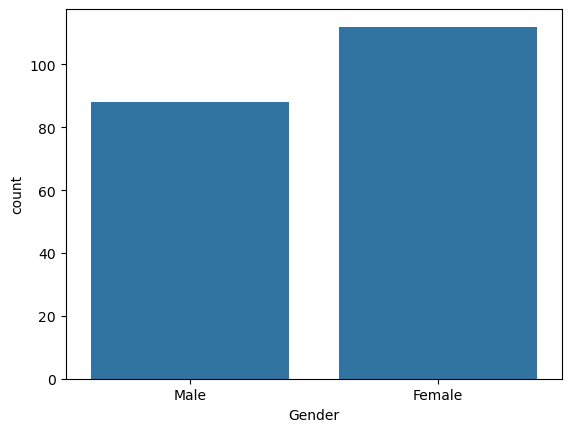

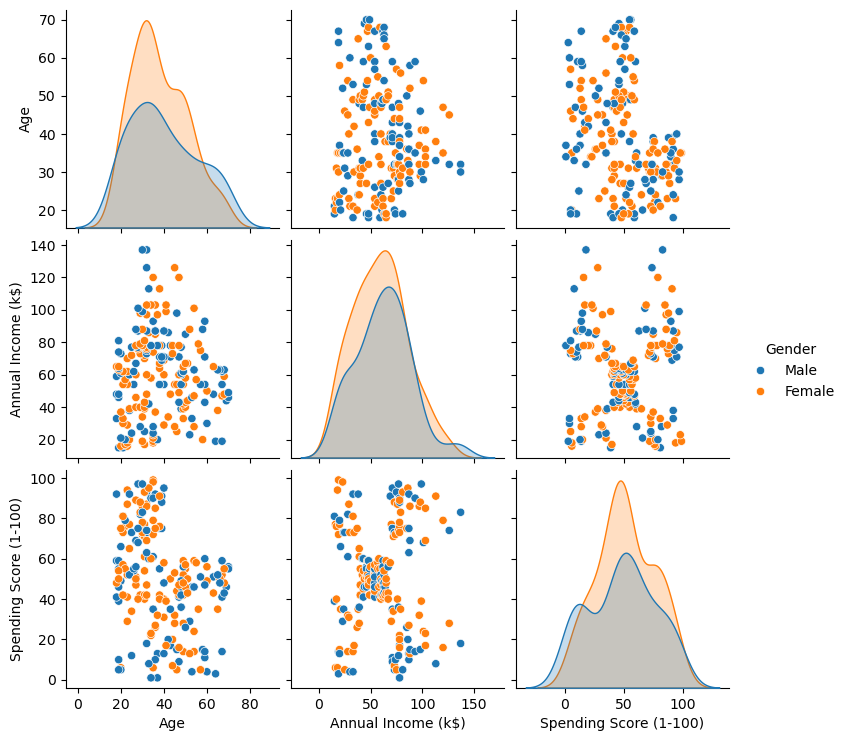

In [8]:
# Visualización de datos
sns.countplot(data=df, x="Gender")
sns.pairplot(df.drop("CustomerID", axis=1), hue="Gender")

In [10]:
# Preprocesamiento de datos
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Eliminar columnas irrelevantes
X = df.drop(['CustomerID'], axis=1)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

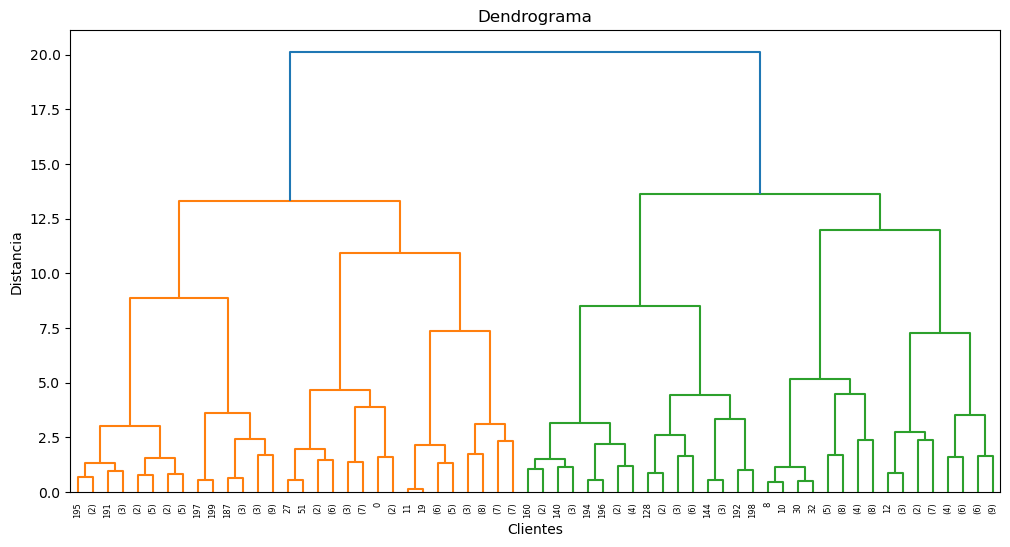

In [12]:
# Entrenamiento con clustering jerárquico
Z = linkage(X_scaled, method='ward')

# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()

# Elegir número de clústeres
clusters = fcluster(Z, 5, criterion='maxclust')
df['Cluster'] = clusters

In [14]:
# Evaluación del modelo
sil_score = silhouette_score(X_scaled, clusters)
calinski_score = calinski_harabasz_score(X_scaled, clusters)

print(f"Coeficiente de Silhouette: {sil_score:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski_score:.2f}")

Coeficiente de Silhouette: 0.287
Índice de Calinski-Harabasz: 64.47


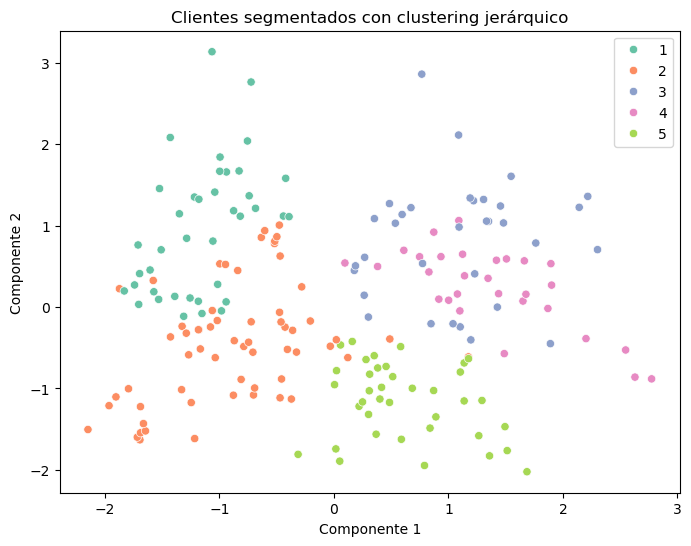

In [16]:
# Visualización de resultados con PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2")
plt.title("Clientes segmentados con clustering jerárquico")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

In [1]:
# Interpretación: El modelo de clustering jerárquico agrupó a los clientes en 5 clústeres bien diferenciados según género, 
# ingresos y puntuación de gasto. El Coeficiente de Silhouette y el Índice de Calinski-Harabasz indican una segmentación razonable.
# Estos clústeres pueden utilizarse para estrategias de marketing diferenciadas.